In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('data.csv', index_col=False)
df_copy = df

In [3]:
df_copy.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df_copy.columns = df_copy.columns.str.lower()
df_copy.columns = df_copy.columns.str.replace(' ', '_') 

string_columns = list(df_copy.dtypes[df_copy.dtypes == 'object'].index)
for col in string_columns:
    df_copy[col] = df_copy[col].str.lower()
    df_copy[col] = df_copy[col].str.lower().str.replace(' ', '_')

df_copy.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df_copy[df_copy.duplicated()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
24,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
25,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,suzuki,x-90,1998,regular_unleaded,95.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,26,22,481,2000
11603,volvo,xc60,2017,regular_unleaded,302.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,29,20,870,46350
11604,volvo,xc60,2017,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,30,23,870,40950
11708,suzuki,xl7,2008,regular_unleaded,252.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,22,15,481,29149


In [7]:
df_copy = df_copy.drop_duplicates(keep='first')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11199 non-null  object 
 1   model              11199 non-null  object 
 2   year               11199 non-null  int64  
 3   engine_fuel_type   11196 non-null  object 
 4   engine_hp          11130 non-null  float64
 5   engine_cylinders   11169 non-null  float64
 6   transmission_type  11199 non-null  object 
 7   driven_wheels      11199 non-null  object 
 8   number_of_doors    11193 non-null  float64
 9   market_category    7823 non-null   object 
 10  vehicle_size       11199 non-null  object 
 11  vehicle_style      11199 non-null  object 
 12  highway_mpg        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  popularity         11199 non-null  int64  
 15  msrp               11199 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
df_copy.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [9]:
df_copy.make.unique()  

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [10]:
df_copy.model.unique()  

array(['1_series_m', '1_series', '100', '124_spider', '190-class',
       '2_series', '200', '200sx', '240sx', '240', '2',
       '3_series_gran_turismo', '3_series', '300-class', '3000gt', '300',
       '300m', '300zx', '323', '350-class', '350z', '360', '370z', '3',
       '4_series_gran_coupe', '4_series', '400-class', '420-class',
       '456m', '458_italia', '4c', '4runner', '5_series_gran_turismo',
       '5_series', '500-class', '500e', '500', '500l', '500x', '550',
       '560-class', '570s', '575m', '57', '599', '5',
       '6_series_gran_coupe', '6_series', '600-class', '6000',
       '612_scaglietti', '626', '62', '650s_coupe', '650s_spider', '6',
       '7_series', '718_cayman', '740', '760', '780', '8_series', '80',
       '850', '86', '9-2x', '9-3_griffin', '9-3', '9-4x', '9-5', '9-7x',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'a3', 'a4_allroad', 'a4', 'a5', 'a6', 'a7', 'a8',
       'acadia_limited', 'acadia', 'accent', 'acclaim'

In [11]:
df_copy.engine_fuel_type.unique()

array(['premium_unleaded_(required)', 'regular_unleaded',
       'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)',
       'diesel', 'electric',
       'flex-fuel_(premium_unleaded_recommended/e85)', 'natural_gas',
       'flex-fuel_(premium_unleaded_required/e85)',
       'flex-fuel_(unleaded/natural_gas)', nan], dtype=object)

In [12]:
df_copy.transmission_type.unique()

array(['manual', 'automatic', 'automated_manual', 'direct_drive',
       'unknown'], dtype=object)

In [13]:
df_copy.driven_wheels.unique()

array(['rear_wheel_drive', 'front_wheel_drive', 'all_wheel_drive',
       'four_wheel_drive'], dtype=object)

In [14]:
df_copy.vehicle_size.unique()

array(['compact', 'midsize', 'large'], dtype=object)

In [15]:
df_copy.vehicle_style.unique()

array(['coupe', 'convertible', 'sedan', 'wagon', '4dr_hatchback',
       '2dr_hatchback', '4dr_suv', 'passenger_minivan', 'cargo_minivan',
       'crew_cab_pickup', 'regular_cab_pickup', 'extended_cab_pickup',
       '2dr_suv', 'cargo_van', 'convertible_suv', 'passenger_van'],
      dtype=object)

In [16]:
df_copy.market_category.unique()

array(['factory_tuner,luxury,high-performance', 'luxury,performance',
       'luxury,high-performance', 'luxury', 'performance', 'flex_fuel',
       'flex_fuel,performance', nan, 'hatchback',
       'hatchback,luxury,performance', 'hatchback,luxury',
       'luxury,high-performance,hybrid', 'diesel,luxury',
       'hatchback,performance', 'hatchback,factory_tuner,performance',
       'high-performance', 'factory_tuner,high-performance',
       'exotic,high-performance', 'exotic,factory_tuner,high-performance',
       'factory_tuner,performance', 'crossover', 'exotic,luxury',
       'exotic,luxury,high-performance', 'exotic,luxury,performance',
       'factory_tuner,luxury,performance', 'flex_fuel,luxury',
       'crossover,luxury', 'hatchback,factory_tuner,luxury,performance',
       'crossover,hatchback', 'hybrid', 'luxury,performance,hybrid',
       'crossover,luxury,performance,hybrid',
       'crossover,luxury,performance',
       'exotic,factory_tuner,luxury,high-performance',
   

In [17]:
df_copy = df_copy.drop('model', axis = 1)
df_copy = df_copy.drop('market_category', axis = 1)
df_copy.head()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135
1,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650
2,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350
3,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450
4,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500


In [18]:
df_copy = df_copy.astype({'make':'category', 'engine_fuel_type':'category', 'transmission_type':'category', 'driven_wheels':'category','vehicle_size':'category', 'transmission_type':'category', 'vehicle_style':'category'})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11199 non-null  category
 1   year               11199 non-null  int64   
 2   engine_fuel_type   11196 non-null  category
 3   engine_hp          11130 non-null  float64 
 4   engine_cylinders   11169 non-null  float64 
 5   transmission_type  11199 non-null  category
 6   driven_wheels      11199 non-null  category
 7   number_of_doors    11193 non-null  float64 
 8   vehicle_size       11199 non-null  category
 9   vehicle_style      11199 non-null  category
 10  highway_mpg        11199 non-null  int64   
 11  city_mpg           11199 non-null  int64   
 12  popularity         11199 non-null  int64   
 13  msrp               11199 non-null  int64   
dtypes: category(6), float64(3), int64(5)
memory usage: 856.0 KB


In [19]:
df_copy = df_copy.dropna(subset=['engine_fuel_type', 'number_of_doors'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11190 non-null  category
 1   year               11190 non-null  int64   
 2   engine_fuel_type   11190 non-null  category
 3   engine_hp          11126 non-null  float64 
 4   engine_cylinders   11160 non-null  float64 
 5   transmission_type  11190 non-null  category
 6   driven_wheels      11190 non-null  category
 7   number_of_doors    11190 non-null  float64 
 8   vehicle_size       11190 non-null  category
 9   vehicle_style      11190 non-null  category
 10  highway_mpg        11190 non-null  int64   
 11  city_mpg           11190 non-null  int64   
 12  popularity         11190 non-null  int64   
 13  msrp               11190 non-null  int64   
dtypes: category(6), float64(3), int64(5)
memory usage: 855.4 KB


<AxesSubplot:xlabel='engine_hp', ylabel='Count'>

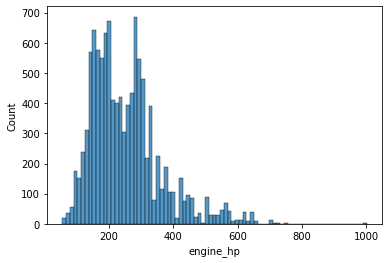

In [20]:
sns.histplot(df_copy.engine_hp)

In [21]:
df_copy.engine_hp.fillna(value = round(df_copy.engine_hp.mean()), inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11190 non-null  category
 1   year               11190 non-null  int64   
 2   engine_fuel_type   11190 non-null  category
 3   engine_hp          11190 non-null  float64 
 4   engine_cylinders   11160 non-null  float64 
 5   transmission_type  11190 non-null  category
 6   driven_wheels      11190 non-null  category
 7   number_of_doors    11190 non-null  float64 
 8   vehicle_size       11190 non-null  category
 9   vehicle_style      11190 non-null  category
 10  highway_mpg        11190 non-null  int64   
 11  city_mpg           11190 non-null  int64   
 12  popularity         11190 non-null  int64   
 13  msrp               11190 non-null  int64   
dtypes: category(6), float64(3), int64(5)
memory usage: 855.4 KB


In [22]:
df_copy.engine_cylinders.unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_cylinders', ylabel='count'>

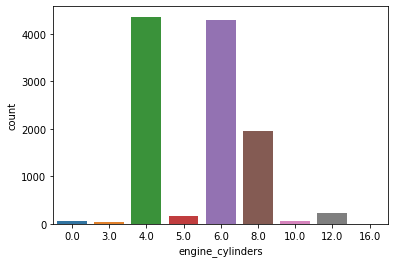

In [23]:
sns.countplot(df_copy.engine_cylinders)

In [24]:
df_copy.engine_cylinders.fillna(df_copy.engine_cylinders.mode()[0], inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11190 non-null  category
 1   year               11190 non-null  int64   
 2   engine_fuel_type   11190 non-null  category
 3   engine_hp          11190 non-null  float64 
 4   engine_cylinders   11190 non-null  float64 
 5   transmission_type  11190 non-null  category
 6   driven_wheels      11190 non-null  category
 7   number_of_doors    11190 non-null  float64 
 8   vehicle_size       11190 non-null  category
 9   vehicle_style      11190 non-null  category
 10  highway_mpg        11190 non-null  int64   
 11  city_mpg           11190 non-null  int64   
 12  popularity         11190 non-null  int64   
 13  msrp               11190 non-null  int64   
dtypes: category(6), float64(3), int64(5)
memory usage: 855.4 KB


In [25]:
int_res = True
for data in df_copy.engine_hp:
    if not data.is_integer():
        int_res = False
print(int_res)

True


In [26]:
int_res = True
for data in df_copy.engine_cylinders:
    if not data.is_integer():
        int_res = False
print(int_res)

True


In [27]:
int_res = True
for data in df_copy.number_of_doors:
    if not data.is_integer():
        int_res = False
print(int_res)

True


In [28]:
#All float columns can be converted to int
df_copy = df_copy.astype({'engine_hp':'int64', 'engine_cylinders':'int64', 'number_of_doors':'int64'})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11190 non-null  category
 1   year               11190 non-null  int64   
 2   engine_fuel_type   11190 non-null  category
 3   engine_hp          11190 non-null  int64   
 4   engine_cylinders   11190 non-null  int64   
 5   transmission_type  11190 non-null  category
 6   driven_wheels      11190 non-null  category
 7   number_of_doors    11190 non-null  int64   
 8   vehicle_size       11190 non-null  category
 9   vehicle_style      11190 non-null  category
 10  highway_mpg        11190 non-null  int64   
 11  city_mpg           11190 non-null  int64   
 12  popularity         11190 non-null  int64   
 13  msrp               11190 non-null  int64   
dtypes: category(6), int64(8)
memory usage: 855.4 KB


In [29]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_copy['make'] = LE.fit_transform(df_copy['make'])
df_copy['engine_fuel_type'] = LE.fit_transform(df_copy['engine_fuel_type'])
df_copy['transmission_type'] = LE.fit_transform(df_copy['transmission_type'])
df_copy['driven_wheels'] = LE.fit_transform(df_copy['driven_wheels'])
df_copy['vehicle_size'] = LE.fit_transform(df_copy['vehicle_size'])
df_copy['vehicle_style'] = LE.fit_transform(df_copy['vehicle_style'])

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   make               11190 non-null  int64
 1   year               11190 non-null  int64
 2   engine_fuel_type   11190 non-null  int64
 3   engine_hp          11190 non-null  int64
 4   engine_cylinders   11190 non-null  int64
 5   transmission_type  11190 non-null  int64
 6   driven_wheels      11190 non-null  int64
 7   number_of_doors    11190 non-null  int64
 8   vehicle_size       11190 non-null  int64
 9   vehicle_style      11190 non-null  int64
 10  highway_mpg        11190 non-null  int64
 11  city_mpg           11190 non-null  int64
 12  popularity         11190 non-null  int64
 13  msrp               11190 non-null  int64
dtypes: int64(14)
memory usage: 1.3 MB


In [31]:
y = df_copy.msrp
X = df_copy.drop('msrp', axis=1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.9736828541128575